### Experiment 1.1
# Boosting Algorithms vs Random Forest - Ethereum Illicit Accounts Dataset
<hr>

### Table of Contents

In [1]:
###### importing dependencies #############################################
import matplotlib.pyplot as plt
from cryptoaml.utils import read_pickle
from IPython.core.display import display, HTML
from cryptoaml.metrics import (
    results_table, 
    plot_metric_dist,
    plot_feature_imp,
    print_model_params, 
    plot_result_matrices,
    display_metrics_stats,
    elliptic_time_indexed_results
)

###### constants ##########################################################
N_features          = 15 # for feature importance N top/bottom
EXP_RESULT_PATH     = "persistence/experiment_1.1/results"
# BENCHMARK_RESULTS   = "{}/{}".format(EXP_RESULT_PATH, "benchmark_model_results.pkl")
DEFAULT_RESULTS     = "{}/{}".format(EXP_RESULT_PATH, "defaults_models_results.pkl")

<a id='defaults'></a>
## Default Parameters - Boosting Models
- [XGBoost: eXtreme Gradient Boosting](https://xgboost.readthedocs.io/en/latest/) 
- [LightGBM: Light Gradient Boosting Machine](https://lightgbm.readthedocs.io/en/latest/) 
- [CatBoost](https://catboost.ai/) 

In [2]:
# load results for default models
default_results = read_pickle(DEFAULT_RESULTS)

<a id='defaults_eval'></a>
### Evaluation Metrics (Defaults)
- Precision 
- Recall 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- <i>AUC</i>
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [3]:
# dataframe with all the perfomance metrics
print("Performance metrics for defaults boosting models")
defaults_metrics_df = results_table(default_results)
display(defaults_metrics_df)

# sorted by f1 score
print("Performance metrics for defaults boosting models sorted by f1-score")
display(defaults_metrics_df.sort_values("f1", ascending=False))

Performance metrics for defaults boosting models


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_ALL,0.989,0.969,0.981,0.981,0.980,0.979
1,light_boost_ALL,0.984,0.968,0.978,0.978,0.977,0.976
2,cat_boost_ALL,0.983,0.980,0.983,0.983,0.983,0.982


Performance metrics for defaults boosting models sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
2,cat_boost_ALL,0.983,0.980,0.983,0.983,0.983,0.982
0,xg_boost_ALL,0.989,0.969,0.981,0.981,0.980,0.979
1,light_boost_ALL,0.984,0.968,0.978,0.978,0.977,0.976


<a id='defaults_confusion'></a>
### Confusion Matrices (Defaults)

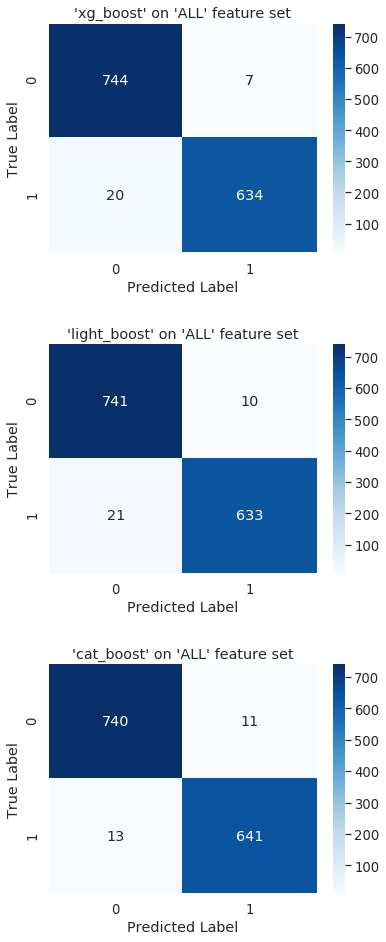

In [4]:
# plot confusion matrices for boosting models with default parameters 
plot_result_matrices(default_results, figsize=(6,16), columns=1)

<a id='defaults_importance'></a>
### Feature Importance (Defaults)

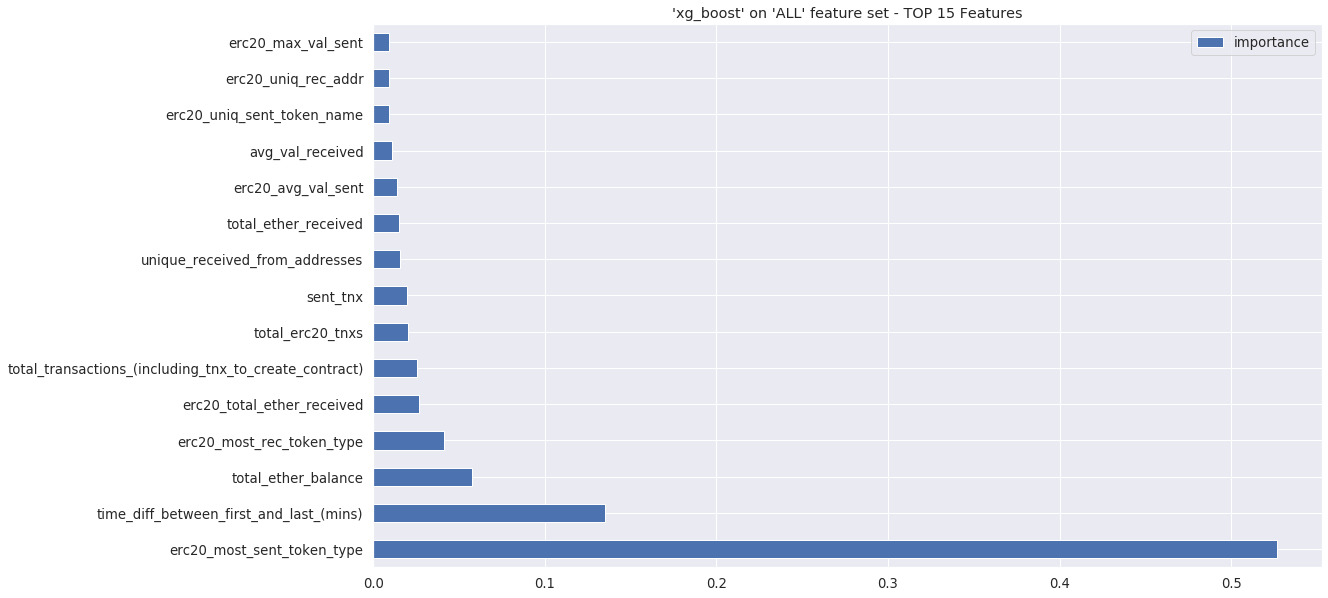

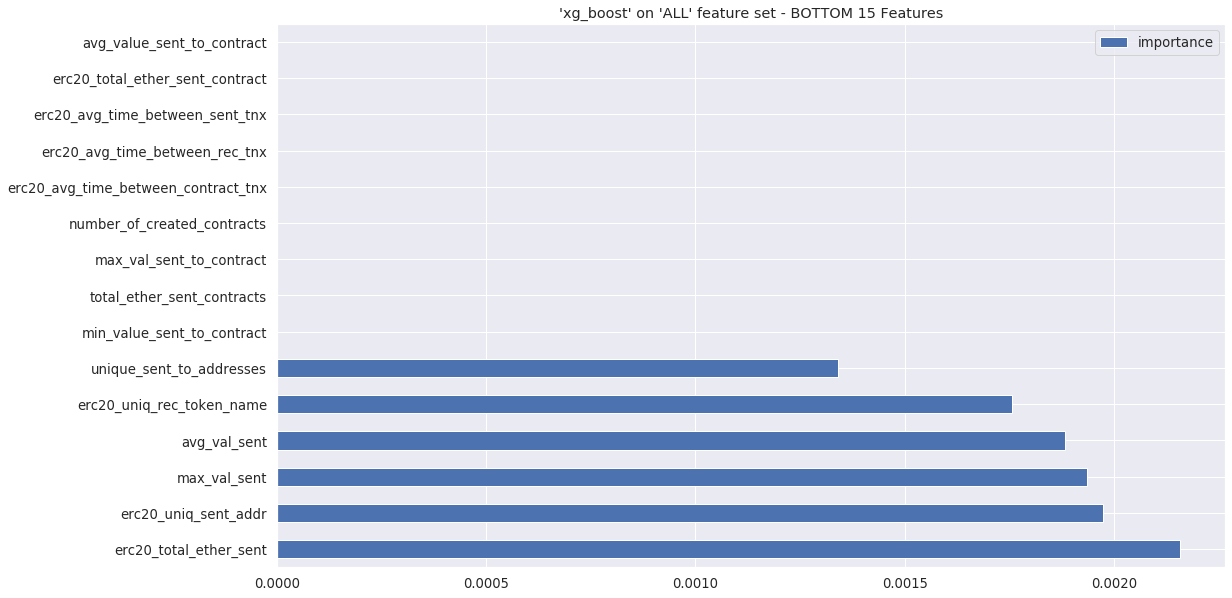

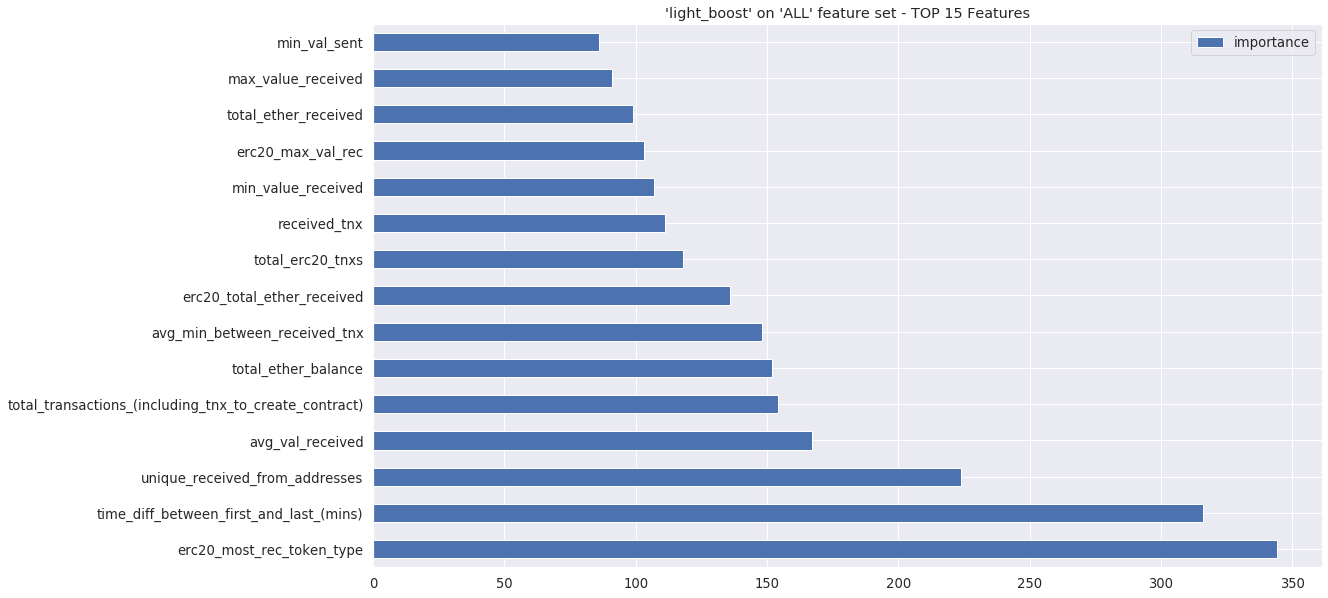

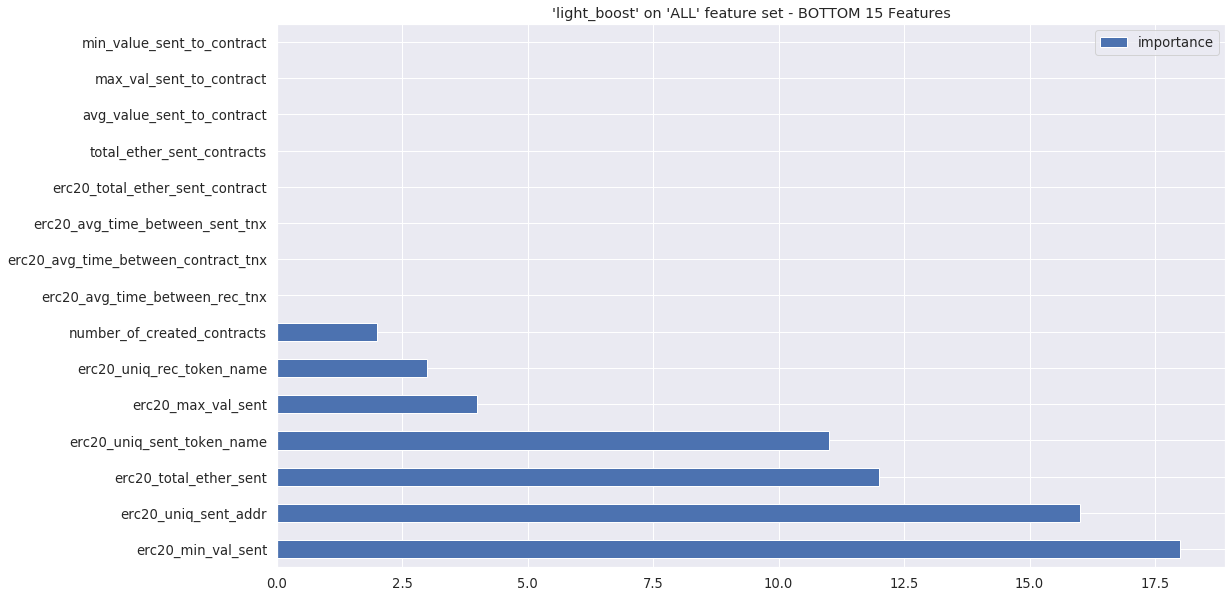

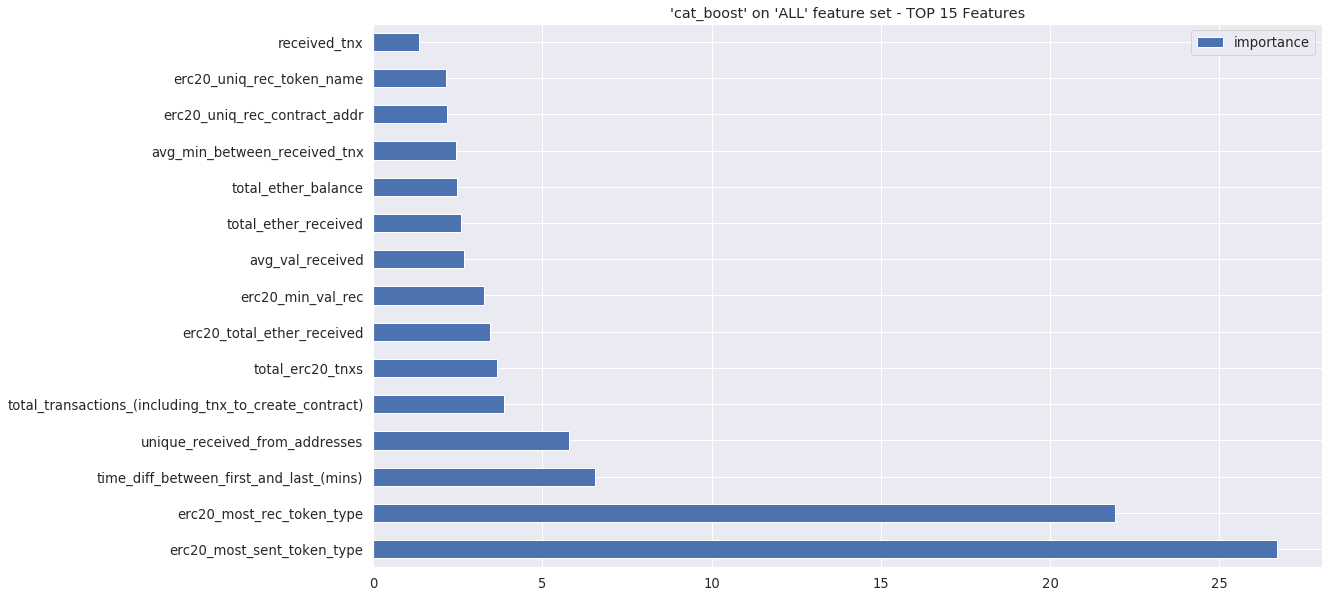

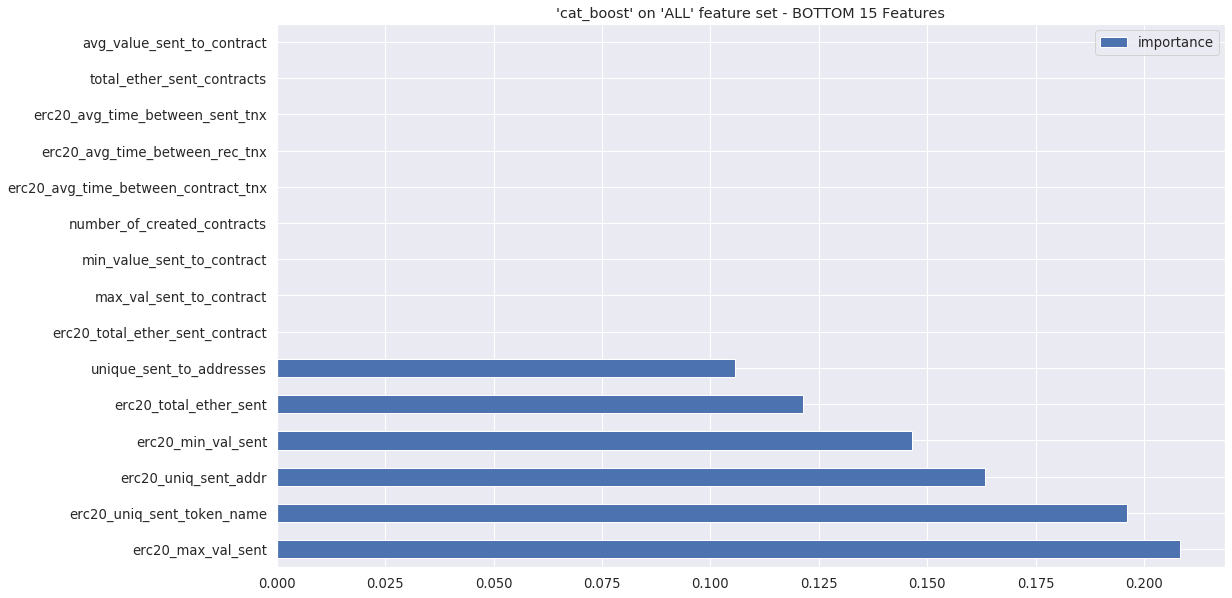

In [7]:
# plot top/bottom N features for boosting models with default parameters 
plot_feature_imp(default_results, N_features, figsize=(17,10))